# Multiple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df_index=pd.read_csv('economic_index.csv')
df_index.head()


,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [5]:
df_index.shape

(24, 6)

In [6]:
df_index.describe()


,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


In [7]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
## Dropping the unnecessary columns

df_index.drop(columns=['Unnamed: 0','year', 'month'], axis=1, inplace=True)

In [9]:
df_index.head()


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

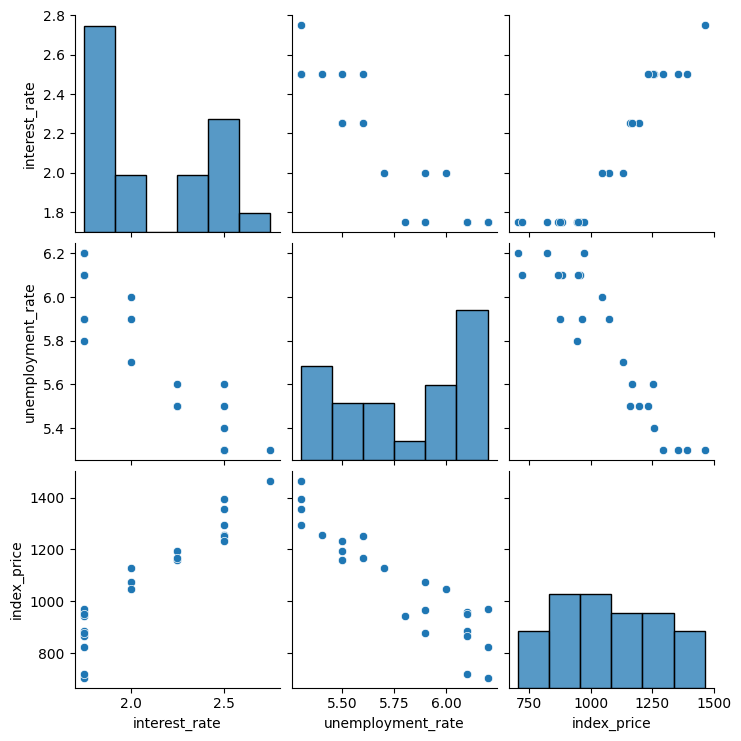

In [11]:
# Let's do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [12]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [13]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


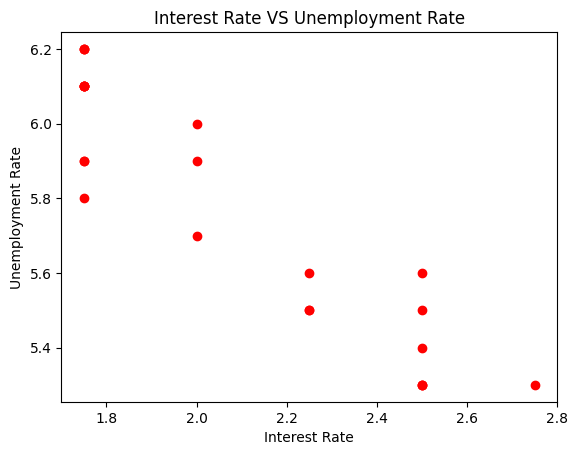

In [14]:
## Visualize the data point more closely.

plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='red')

plt.title('Interest Rate VS Unemployment Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [15]:
## Independent and Dependent Features

X = df_index.iloc[:, :-1]
Y = df_index.iloc[:, -1]

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

In [20]:
X_train.shape

(18, 2)

In [21]:
X_test.shape

(6, 2)

In [23]:
y_train.shape

(18,)

In [24]:
y_test.shape

(6,)

In [26]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [27]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

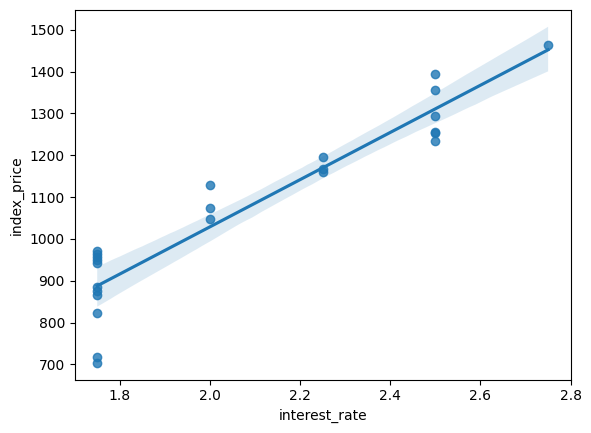

In [32]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

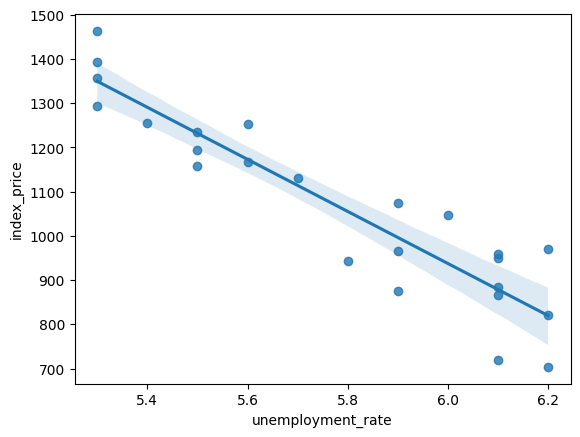

In [33]:
sns.regplot(x='unemployment_rate', y='index_price', data=df_index)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [42]:
regression.fit(X_train, y_train)

LinearRegression()

In [65]:
regression.coef_

array([  88.27275507, -116.25716066])

In [ ]:
## Cross - Validation

from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [48]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [51]:
## Prediction
y_pred=regression.predict(X_test)

In [52]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [53]:
# Performance Metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  8108.567426306604
MAE:  73.80444932337097
RMSE:  90.04758423359621


In [54]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R^2 Score: ",score)

R^2 Score:  0.7591371539010257


In [55]:
n=len(y_test)
k=X_test.shape[1]

adjusted_r_squared=1-((1-score)*(n-1)/(n-k-1))
print("Adjusted R^2: ",adjusted_r_squared)

Adjusted R^2:  0.5985619231683761


### Assumptions

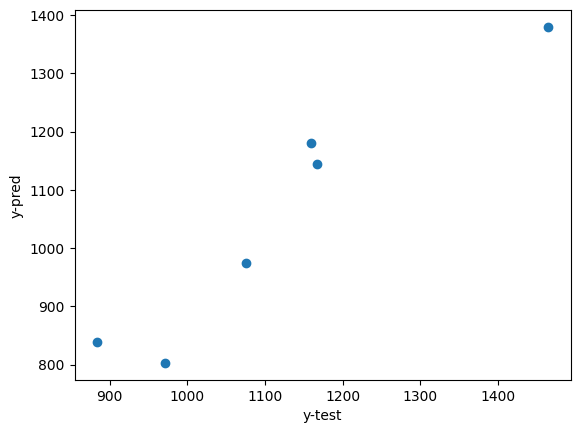

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('y-test')
plt.ylabel('y-pred')
plt.show()

In [59]:
residuals=y_test-y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

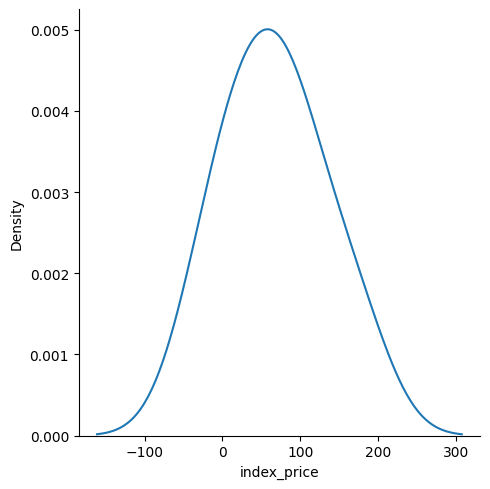

In [60]:
## Plot the residuals
sns.displot(residuals, kind='kde')

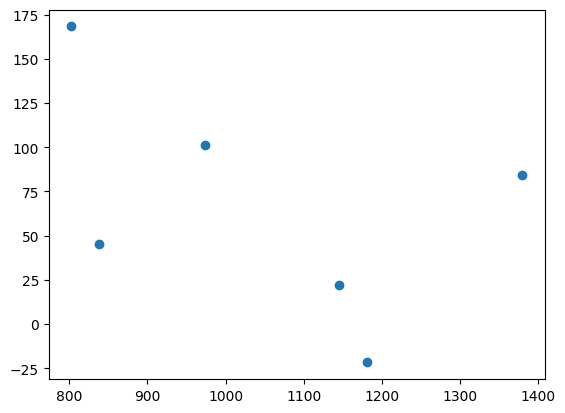

In [61]:
## Create a plot with respect to predictions and residuals.

plt.scatter(y_pred, residuals)

In [62]:
## OLS Linear Regression
import statsmodels.api as sm


In [63]:
model=sm.OLS(y_train, X_train).fit()

In [64]:
model.summary()

d:\Study\Coading New Start\ML journey\Assignments\assignment_solution\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 24 May 2025   Prob (F-statistic):                       0.754
Time:                        12:55:52   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""